In [8]:
from numpy import arange, zeros, tanh
import matplotlib.pyplot as plt
import neuronioE
import neuronioI

In [9]:
plt.style.use('bmh')

In [15]:
def euler(g_sin):
    tau_s = 0.1
    tau_d = 3
    E_rev = 0
    tempo_disparos = []

    VI, hI, nI, j_sin = zeros(N), zeros(N), zeros(N), zeros(N)
    VI[0] = -65
    hI[0] = neuronioI.alpha('h', VI[0]) / (neuronioI.alpha('h',VI[0])+neuronioI.beta('h',VI[0]))
    hI[0] = neuronioI.alpha('n', VI[0]) / (neuronioI.alpha('n',VI[0])+neuronioI.beta('n',VI[0]))

    VE, hE, nE, s = zeros(N), zeros(N), zeros(N), zeros(N)
    s[0] = 0
    VE[0] = -65
    hE[0] = neuronioE.alpha('h', VE[0]) / (neuronioE.alpha('h',VE[0])+neuronioE.beta('h',VE[0]))
    hE[0] = neuronioE.alpha('n', VE[0]) / (neuronioE.alpha('n',VE[0])+neuronioE.beta('n',VE[0]))

    for k in range(N-1):
        VE[k+1] = VE[k] + dt * neuronioE.dvdt(VE[k],hE[k],nE[k],j_inj[k],0)
        hE[k+1] = hE[k] + dt * neuronioE.dhdt(VE[k],hE[k])
        nE[k+1] = nE[k] + dt * neuronioE.dndt(VE[k],nE[k])
        s[k+1] = s[k] + dt * (((1+tanh(VE[k]/4))/2)*((1-s[k])/tau_s)-s[k]/tau_d)
        if VE[k+1] >=0 > VE[k]:
            tempo_disparos.append(t[k])

        j_sin[k] = g_sin * s[k] * (E_rev - VI[k])

        VI[k+1] = VI[k] + dt * neuronioI.dvdt(VI[k],hI[k],nI[k],0,j_sin[k])
        hI[k+1] = hI[k] + dt * neuronioI.dhdt(VI[k],hI[k])
        nI[k+1] = nI[k] + dt * neuronioI.dndt(VI[k],nI[k])

    return VE, VI, tempo_disparos

In [16]:
tmax = 500
ti, tf = 5, 450
dt = 0.001
N = round(tmax/dt)
t = arange(0, tmax, dt)
corrente = lambda j: j*(t>=ti)-j*(t>=tf)
j_inj = corrente(j=1.5)

In [12]:
condutancias = (0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22, 0.24, 0.26, 0.28)

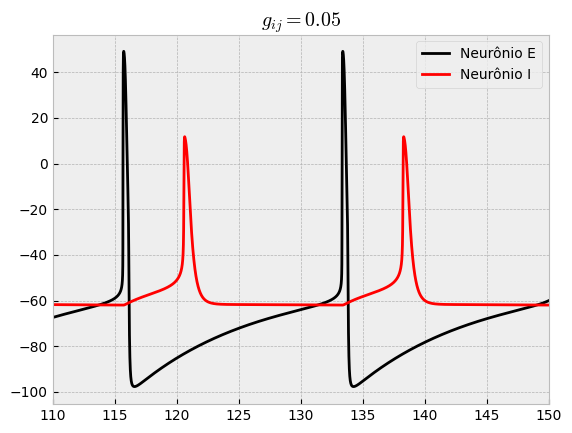

intervalo entre disparos = 17.638
intervalo entre disparos = 17.666
intervalo entre disparos = 17.665


In [20]:
VE, VI, tempo_disparos = euler(0.05)

plt.title('$g_{ij}=0.05$')
plt.plot(t, VE,'k', label='Neurônio E')
plt.plot(t, VI,'r', label='Neurônio I')
plt.legend()
plt.axis(xmin=110, xmax=150)

plt.show()

intervalo = tempo_disparos[1] - tempo_disparos[0]
print(f'intervalo entre disparos = {intervalo}')

intervalo = tempo_disparos[2] - tempo_disparos[1]
print(f'intervalo entre disparos = {intervalo}')


intervalo = tempo_disparos[3] - tempo_disparos[2]
print(f'intervalo entre disparos = {intervalo}')

In [23]:
def plot_graficos():
    for i, cond in enumerate(condutancias):
        g_sin = cond
        VE, VI, _ = euler(g_sin)

        plt.title('$g_{ij}='f'{g_sin}$')
        plt.plot(t, VE,'k', label='Neurônio E')
        plt.plot(t, VI,'r', label='Neurônio I')
        plt.legend()
        plt.axis(xmin=110, xmax=175)

        plt.show()

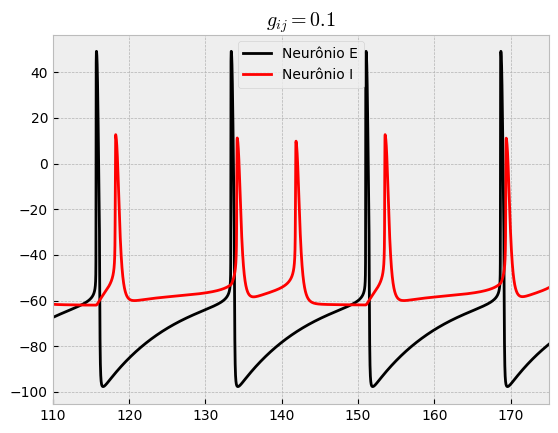

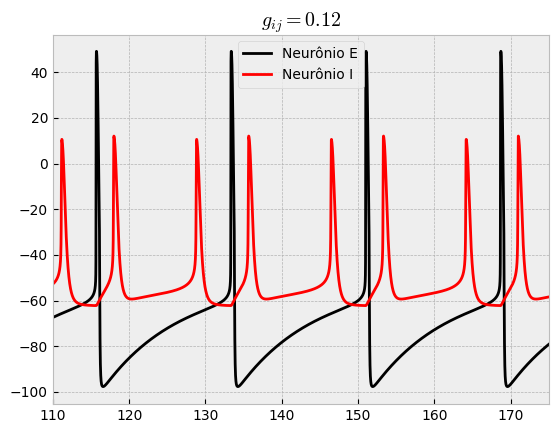

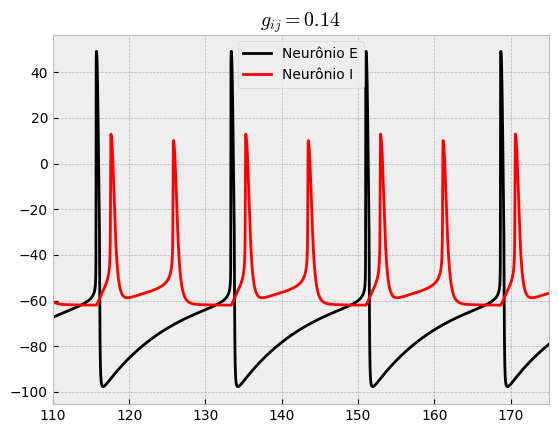

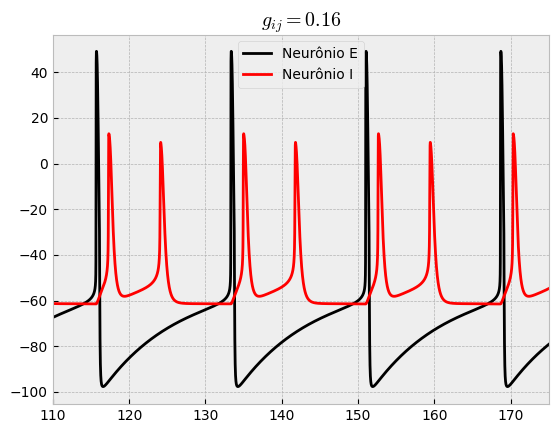

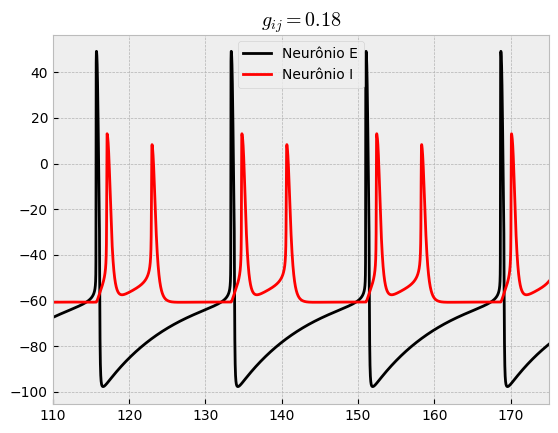

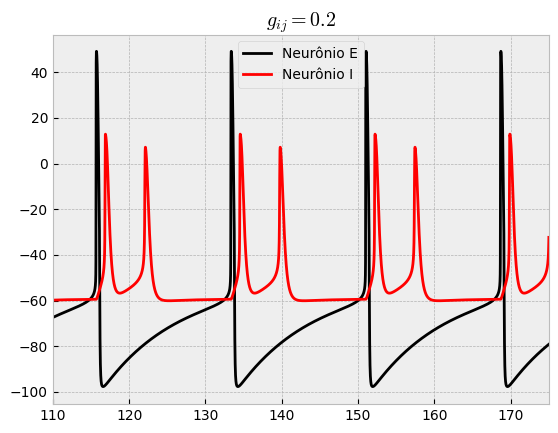

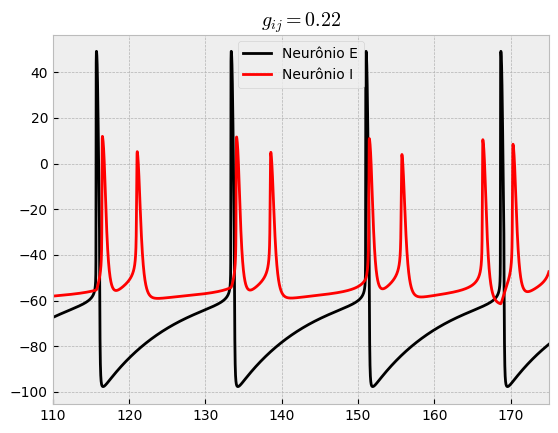

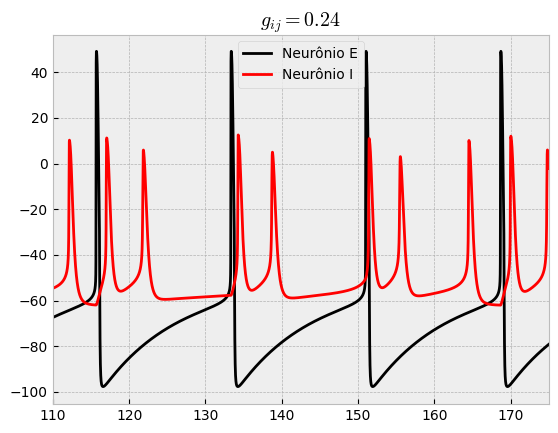

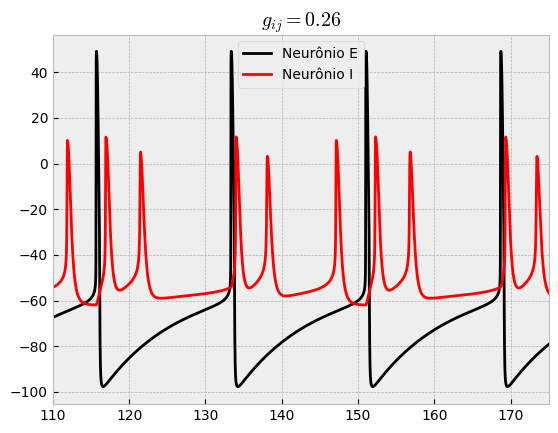

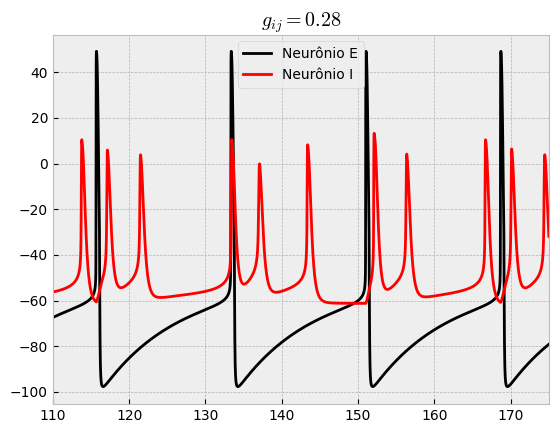

In [24]:
plot_graficos()